<a href="https://colab.research.google.com/github/kryksh/master-thesis/blob/master/NN_COLAB_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import shelve
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, BatchNormalization, SimpleRNN, Dropout, Flatten
from keras.layers import LSTM
from keras import backend as K
from keras.regularizers import l2 
import shelve
import math
import tensorflow as tf
from tensorflow import keras
import cv2
import time
import pprint

Using TensorFlow backend.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
download = drive.CreateFile({'id': '17U-fCI_gFZjMtUXGl_PhYJClaYmnii2l'})
download.GetContentFile('python_files.tar')
!tar -xvf python_files.tar
!rm python_files.tar

camera_calibration.py
facial_feature_detector.py
frontalize.py
get_default_points.py
get_frontal_image.py
merge.py
new_paint.py
paint.py
pre_audio.py
preprocessing.py
pre_video.py
shelve_reader.py


In [0]:
download = drive.CreateFile({'id': '13CU7PrquSDYhfkc5IjwNQ32qLFcB89Kc'})
download.GetContentFile('for_front.tar')
!tar -xvf for_front.tar
!rm for_front.tar

dlib_models/
dlib_models/shape_predictor_68_face_landmarks.dat
frontalization_models/
frontalization_models/eyemask.mat
frontalization_models/model3Ddlib.mat
frontalization_models/DataAlign2LFWa.mat
frontalization_models/ref3d.pkl


In [0]:
download = drive.CreateFile({'id': '1qpn7lpmpLLWfEB60oDUaKOaWDW3X3PCF'})
download.GetContentFile('extracted_data.tar')
!tar -xvf extracted_data.tar
!rm extracted_data.tar

extracted_data/merge_0.csv
extracted_data/merge_1.csv
extracted_data/merge_2.csv
extracted_data/merge_3.csv
extracted_data/merge_4.csv
extracted_data/merge_5.csv
extracted_data/merge_6.csv
extracted_data/merge_7.csv


In [0]:
download = drive.CreateFile({'id': '10Kb1Ytn1q0liy4KKdOiwhmE2p8Y-NNUY'})
download.GetContentFile('data.tar')
!tar -xvf data.tar
!rm data.tar

data/
data/video_1.mp4
data/audio_0.wav
data/video_0.mp4
data/audio_7.wav
data/video_6.mp4
data/audio_3.wav
data/video_5.mp4
data/audio_5.wav
data/ddef_face_5.png
data/ddef_face_7.png
data/audio_6.wav
data/video_3.mp4
data/video_2.mp4
data/video_7.mp4
data/audio_2.wav
data/ddef_face_6.png
data/audio_4.wav
data/video_4.mp4
data/audio_1.wav


In [0]:
def getFirstFrame(videofile, imagefile):
    vidcap = cv2.VideoCapture(videofile)
    success, image = vidcap.read()
    if success:
        cv2.imwrite(imagefile, image)

In [0]:
import preprocessing
import get_default_points
import get_frontal_image

In [0]:
getFirstFrame('/content/data/video_0.mp4', '/content/data/for_def_face_0.png')
getFirstFrame('/content/data/video_1.mp4', '/content/data/for_def_face_1.png')
getFirstFrame('/content/data/video_2.mp4', '/content/data/for_def_face_2.png')
getFirstFrame('/content/data/video_3.mp4', '/content/data/for_def_face_3.png')
getFirstFrame('/content/data/video_4.mp4', '/content/data/for_def_face_4.png')
getFirstFrame('/content/data/video_5.mp4', '/content/data/for_def_face_5.png')
getFirstFrame('/content/data/video_6.mp4', '/content/data/for_def_face_6.png')
getFirstFrame('/content/data/video_7.mp4', '/content/data/for_def_face_7.png')

In [0]:
get_frontal_image.get_frontal_image('/content/data/for_def_face_0.png')
!mv frontal_image.png data/def_face_0.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_1.png')
!mv frontal_image.png data/def_face_1.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_2.png')
!mv frontal_image.png data/def_face_2.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_3.png')
!mv frontal_image.png data/def_face_3.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_4.png')
!mv frontal_image.png data/def_face_4.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_5.png')
!mv frontal_image.png data/def_face_5.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_6.png')
!mv frontal_image.png data/def_face_6.png
get_frontal_image.get_frontal_image('/content/data/for_def_face_7.png')
!mv frontal_image.png data/def_face_7.png

In [0]:
get_default_points.extract_def_pts()

data/def_face_0.png
data/def_face_1.png
data/def_face_2.png
data/def_face_3.png
data/def_face_4.png
data/def_face_5.png
data/def_face_6.png
data/def_face_7.png


In [0]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import shelve

def get_time_series(file, length):
    df = pd.read_csv(file)
    t_prev = 0.0
    X = []
    x = []
    y = []

    for row in df.values:
        t, a, v = row[0], row[1: 14], row[14: ]
        if x:
            if round(t - t_prev) < 35:
                x.append(a)
                if len(x) == length:
                    X.append(x)
                    y.append(v)
                    x = x[1: ]
            else:
                x = [a]
        else:
            x.append(a)
            if len(x) == length:
                X.append(x)
                y.append(v)
                x = x[1: ]

        t_prev = t

    return X, y

def prepr_test(file, points, length):
    X = []
    y = []
    X_, y_ = get_time_series(file, length)
    db = shelve.open(points, 'r')
    default_points = np.array(db['default_face']).ravel()
    db.close()
    y_ = y_ - default_points
    y_ = np.array(y_)
    X.extend(X_)
    y.extend(y_)
    
    for i, x in enumerate(X):
        tmp = []
        for mfcc in x:
            tmp.extend(mfcc)
        X[i] = tmp
    X = np.array(X)


    for i, y_ in enumerate(y):
        y[i] = y[i][96:]
    y = np.array(y)

    # нормализация звуков
    scaler = StandardScaler()
    #print(X_test)
    X = scaler.fit_transform(X)

    return X, y

In [0]:
!mv extracted_data/merge_7.csv extracted_data/test.csv 

In [0]:
length = 16
X_train, X_val, y_train, y_val = preprocessing.prepr(length=length, shuff=True)

asd [-11.  -2.  -9.  -1.  -7.  -1.  -5.   0.  -3.   1.  -2.  -1.   0.  -3.
   1.  -3.   0.  -4.   0.  -6.   1.  -5.   2.  -3.   5.  -2.   6.  -1.
   9.   0.  10.   0.  11.  -1.  -8.  -3.  -5.  -1.  -3.   1.  -2.   0.
   0.  -2.   1.  -1.   1.  -1.   3.  -2.   4.  -3.   6.  -4.   1.   1.
  -1.   1.  -1.   2.  -2.   3.  -1.   2.  -1.   3.  -2.   2.  -2.   2.
  -3.   1.  -5.   1.  -4.   1.  -2.   0.  -2.   1.  -2.   1.  -3.   2.
   0.   1.   1.  -1.   3.  -1.   4.   0.   3.   1.   2.   1.   1.   1.
   0.   1.  -1.   0.  -2.  -1.  -4.   0.  -4.   0.  -7.   1.  -5.   1.
  -4.   0.  -2.   0.  -1.   0.   0.   1.   2.   1.  -1.  -1.  -2.  -1.
  -4.   0.  -8.   1.  -4.   0.  -2.   0.  -1.   1.]


In [0]:
X_test, y_test = prepr_test('/content/extracted_data/test.csv', '/content/extracted_data/default_points_7.txt', length)

In [0]:
rnn_X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
rnn_X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rnn_X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [0]:
print(rnn_X_train.shape, y_train.shape)
print(rnn_X_val.shape, y_val.shape)
print(rnn_X_test.shape, y_test.shape)

(281408, 208, 1) (281408, 40)
(31268, 208, 1) (31268, 40)
(76119, 208, 1) (76119, 40)


In [0]:
#n = round(math.sqrt(40 * 13 * length)) * 2
def get_model():
  return keras.Sequential([
    keras.layers.LSTM(80, activation='sigmoid', return_sequences=True, input_shape=(13*length, 1)),
    keras.layers.LSTM(80),
    #keras.layers.Dense(round(n/2), activation='tanh'),
    #keras.layers.Dense(80, activation='tanh'),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(60, activation='tanh'),
    keras.layers.Dense(40, activation='linear')
  ])

In [0]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())
  
def R_squared(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.div(residual, total))
  return r2

def max_error(y_true, y_pred):
  return K.max(K.abs(y_true - y_pred))


lstm_model = get_model()
lstm_model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss='mse',
              metrics=[R_squared])


lstm_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 208, 80)           26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense (Dense)                (None, 40)                3240      
Total params: 81,000
Trainable params: 81,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

with tf.Session(TF_MASTER) as session:
  print ('List of devices:')
  pprint.pprint(session.list_devices())

List of devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 7916786588808348970),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 16699213805441005141),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 4135136820598844845),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 13850192808593984690),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 14298482757506614324),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 12581471877824663446),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 5197309011729282596),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 6342608219964887220),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 195942560180287127),
 _DeviceAttributes(/job:tpu

In [0]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    lstm_model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TF_MASTER)))

tpu_model.summary()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.125.3.250:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7916786588808348970)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 16699213805441005141)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 4135136820598844845)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1

In [0]:
# Train the model
start_time = time.time()
history = tpu_model.fit(rnn_X_train, y_train, validation_data=(rnn_X_val, y_val), epochs=100, batch_size=128)
print("--- %s seconds ---" % (time.time() - start_time))

Train on 281408 samples, validate on 31268 samples
Epoch 1/100
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(16, 208, 1), dtype=tf.float32, name='lstm_input_10'), TensorSpec(shape=(16, 40), dtype=tf.float32, name='dense_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for lstm_input
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling


In [0]:
tpu_model.save_weights('tpu_model.h5', overwrite=True)

INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
eva = tpu_model.evaluate(rnn_X_val, y_val)

31229/31229 [==============================] - 18s 567us/sample - loss: 1.8799 - R_squared: 0.6921


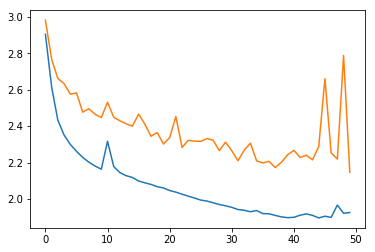

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

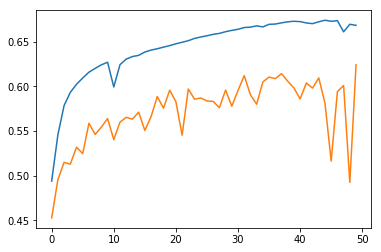

In [0]:
plt.plot(history.history['R_squared'])
plt.plot(history.history['val_R_squared'])

In [0]:
def r2(y_true, y_pred):
  SS_res =  np.sum((y_true - y_pred)**2) 
  SS_tot = np.sum((y_true - np.mean(y_true))**2) 
  return 1 - SS_res/(SS_tot)
print(r2(y_test[:-7], np.round(tpu_model.predict(rnn_X_test[:-7]))))

INFO:tensorflow:New input shapes; (re-)compiling: mode=infer (# of cores 8), [TensorSpec(shape=(4, 390, 1), dtype=tf.float32, name='lstm_input_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for lstm_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 22.19285798072815 secs
0.6019290434509164


In [0]:
print(np.max(np.abs((tpu_model.predict(rnn_X_test[:-7]) - y_test[:-7]))))

In [0]:
#!mv extracted_data/merge_1.csv extracted_data/1merge_1.csv 
#!mv extracted_data/merge_2.csv extracted_data/1merge_2.csv 
#!mv extracted_data/merge_3.csv extracted_data/1merge_3.csv 
#!mv extracted_data/merge_4.csv extracted_data/1merge_4.csv 
#!mv extracted_data/merge_5.csv extracted_data/1merge_5.csv 
#!mv extracted_data/merge_6.csv extracted_data/1merge_6.csv 
#!mv extracted_data/merge_7.csv extracted_data/1merge_7.csv 

In [0]:
pred = tpu_model.predict(rnn_X_test[:-7])
pred = np.hstack((np.zeros(shape=(pred.shape[0], 96)), pred))
pred = pred.reshape(pred.shape[0], 68,2)
pred = pred.round().astype(np.int32)

In [0]:
def get_video(pred):
    with shelve.open('extracted_data/default_points_7.txt', 'r') as db:
        default_points = db['default_face']
        points_to_indexes = {tuple(p): i for i, p in enumerate(default_points)}

    default_face = cv2.imread('data/def_face_7.png')
    subdiv = cv2.Subdiv2D((0,0,320,320))
    print(subdiv)

    for p in default_points:
        subdiv.insert(tuple(p))

    def get_frame(delta):
        # delta: list of ### with shape (num_points, 2)
        triangles = []

        for t in subdiv.getTriangleList():
            
            if not {tuple(t[i: i + 2]) for i in (0, 2, 4)}.issubset(set(points_to_indexes.keys())):
                continue

            # affine transform
            old_pts = np.array([t[:2], t[2:4], t[4:]], np.int32)
            d = np.array([delta[points_to_indexes[tuple(t[i: i + 2])]]  for i in (0, 2, 4)])
            new_pts = old_pts + d
            affinne_transform = cv2.getAffineTransform(old_pts.astype(np.float32), new_pts.astype(np.float32))
            aff_image = cv2.warpAffine(default_face, affinne_transform, default_face.shape[:2], None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

            # masking of affine image
            mask = np.zeros(aff_image.shape, dtype=np.uint8)
            channel_count = aff_image.shape[2]
            ignore_mask_color = (255,)*channel_count
            cv2.fillPoly(mask, [new_pts], ignore_mask_color)
            masked_image = cv2.bitwise_and(aff_image, mask)

            triangles.append(masked_image)

        triangles = np.array(triangles, dtype=np.float32)
        #print('triangles: ', triangles.shape)

        t1 = time.time()
        #print('triangles: ', triangles.shape)
        triangles[(triangles == 0).all(axis=3)] = np.nan
        res = np.nan_to_num(np.nanmean(triangles, axis=0)).astype(np.uint8)

        #print(time.time() - t1)
        return res

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 30, (320,320))
    
    for i, delta in enumerate(pred):
        print('Frame number {} : {}'.format(i + 1, len(pred)))
        out.write(get_frame(delta))
    
    out.release()

In [0]:
get_video(pred[:500])

<Subdiv2D 0x7f1043bc8a10>
Frame number 1 : 500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


Frame number 2 : 500
Frame number 3 : 500
Frame number 4 : 500
Frame number 5 : 500
Frame number 6 : 500
Frame number 7 : 500
Frame number 8 : 500
Frame number 9 : 500
Frame number 10 : 500
Frame number 11 : 500
Frame number 12 : 500
Frame number 13 : 500
Frame number 14 : 500
Frame number 15 : 500
Frame number 16 : 500
Frame number 17 : 500
Frame number 18 : 500
Frame number 19 : 500
Frame number 20 : 500
Frame number 21 : 500
Frame number 22 : 500
Frame number 23 : 500
Frame number 24 : 500
Frame number 25 : 500
Frame number 26 : 500
Frame number 27 : 500
Frame number 28 : 500
Frame number 29 : 500
Frame number 30 : 500
Frame number 31 : 500
Frame number 32 : 500
Frame number 33 : 500
Frame number 34 : 500
Frame number 35 : 500
Frame number 36 : 500
Frame number 37 : 500
Frame number 38 : 500
Frame number 39 : 500
Frame number 40 : 500
Frame number 41 : 500
Frame number 42 : 500
Frame number 43 : 500
Frame number 44 : 500
Frame number 45 : 500
Frame number 46 : 500
Frame number 47 : 

In [0]:
pred = y_test
pred = np.hstack((np.zeros(shape=(pred.shape[0], 96)), pred))
pred = pred.reshape(pred.shape[0], 68,2)
pred = pred.round().astype(np.int32)